Broad Question #2:
    We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.  
Question: Can age, start time, and average length of session predict hours played in player.csv? 

Since the broad question asks to predict "large amounts" of data instead if an exact numeric value, and the amount of data collected in the study is directly related to the amount of active time a user plays, the `played_hours` variable segmented into intervals of time is a good approach to classifying large and not large amounts of data being contributed.   

The time intervals will be assigned as follows (powers of 5):  
`played_hours` < 1 =  minimal  
1 <= `player_hours` < 5 = low  
5 <= `played_hours` < 25 = moderate  
25 <= `played_hours` < 125 = high  
125 <= `played_hours` = very high

use age, start time, length of each session? then using email, link to experience.
final answer to question will include age groups, when they play, for how long, and claimed experience,
by knn regression, with played_hours as the response variable

The `player.csv`  dataset contains information describing the users. It is contains 196 observations (users) and 7 variables about them. 
<br>Those variables are:
- `experience` -- character, self identified level of experience
- `subscribe` -- logical, whether the user is subscribed to the blog
- `hashedEmail` -- character, hashed form of user email
- `played_hours` -- double, total time in hours a user has been on the server
- `name` -- character, user name
- `gender` -- character, user gender
- `Age` -- double, user age.

The `sessions.csv` dataset contains information describing the times when users are online. It contains 1535 observations and 5 variables.
Those variables are:
- `hashedEmail` -- character, hashed form of user email
- `start_time` -- character, date and time when user joins the server
- `end_time` -- character, date and time when user leaves the server
- `original_start_time` -- double, `start_time` in milliseconds
- `original_end_time` -- double, `end_time` in milliseconds

There does not appear to be any issues with the data itself, however the way in which `plaicraft.ai` operates in regards to allotted time could skew the amount of time a user is online. For instance, if there was no one else online for them to talk with, they would be limited to the amount of time they have access to on the server.

In [27]:
library(tidyverse)
library(repr)

player_url <- "https://raw.githubusercontent.com/n-b-t/DSCI-100-Project-individual-/refs/heads/main/data/players.csv"
player_data <- read_csv(player_url)

head(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [35]:
library(lubridate)

sessions_url <- "https://raw.githubusercontent.com/n-b-t/DSCI-100-Project-individual-/refs/heads/main/data/sessions.csv"
sessions_data <- read_csv(sessions_url)

sessions_tidy <- sessions_data |>
                separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
                separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
                mutate(start_date = dmy(start_date), end_date = dmy(end_date))

head(sessions_tidy)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25,03:22,2024-07-25,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25,16:01,2024-05-25,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23,15:08,2024-06-23,17:10,1.71916e+12,1.71916e+12


In [41]:
combined_data <- merge(player_data, sessions_tidy, "hashedEmail")
head(combined_data)

,hashedEmail,experience,subscribe,played_hours,name,gender,Age,start_date,start_time,end_date,end_time,original_start_time,original_end_time
,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
1,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,2024-05-23,00:22,2024-05-23,01:07,1.71642e+12,1.71643e+12
2,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,2024-05-22,23:12,2024-05-23,00:13,1.71642e+12,1.71642e+12
3,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,2024-06-28,04:28,2024-06-28,04:58,1.71955e+12,1.71955e+12
4,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,2024-09-19,21:01,2024-09-19,21:12,1.72678e+12,1.72678e+12
5,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,2024-08-30,03:40,2024-08-30,04:04,1.72499e+12,1.72499e+12
6,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,2024-08-27,19:18,2024-08-27,19:52,1.72479e+12,1.72479e+12


In [102]:
player_data_age_hours <- select(player_data,played_hours, Age)

player_data_summaries <- bind_cols(summary = c("Mean", "Median","Minimum","Maximum"),
                                    bind_rows(map_df(player_data_age_hours, mean, na.rm = TRUE),
                                            map_df(player_data_age_hours, median, na.rm = TRUE),
                                            map_df(player_data_age_hours, min, na.rm = TRUE),
                                            map_df(player_data_age_hours, max, na.rm = TRUE))) |>
                                    mutate(across(c(played_hours, Age), round, 2))
player_data_summaries

summary,played_hours,Age
<chr>,<dbl>,<dbl>
Mean,5.85,21.14
Median,0.10,19.00
Minimum,0.00,9.00
Maximum,223.10,58.00


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


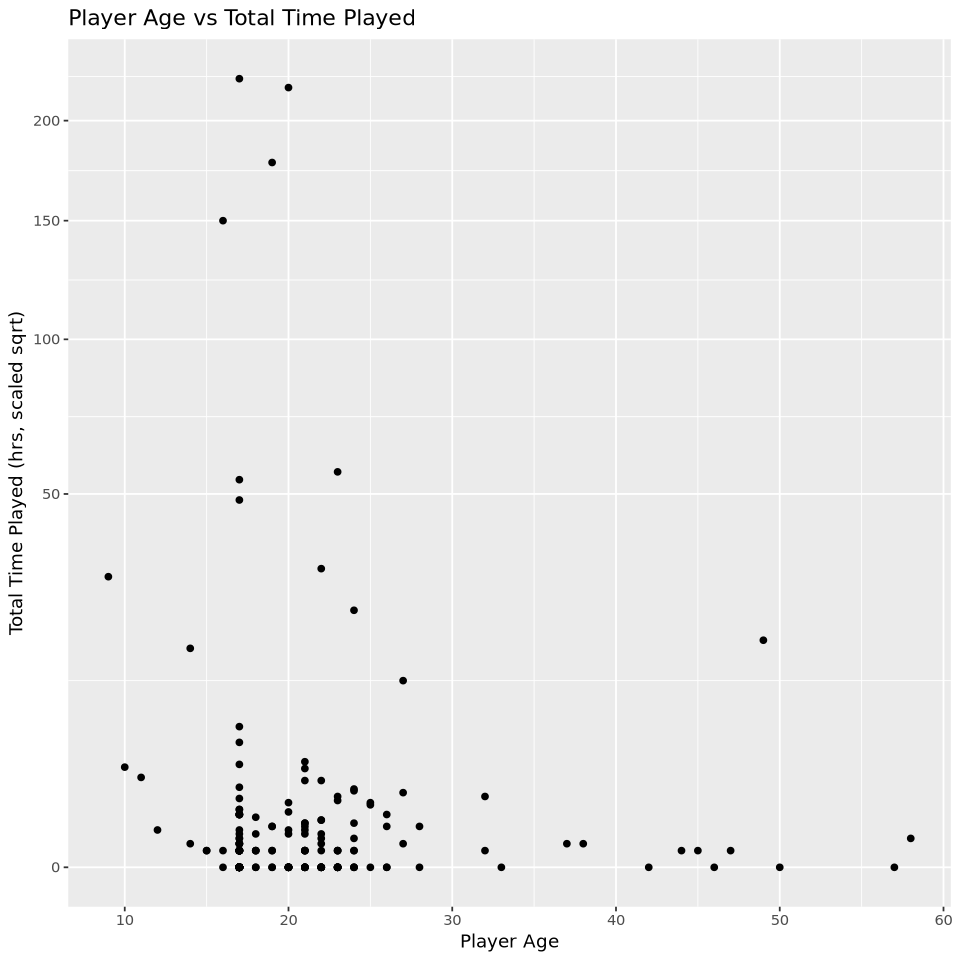

In [52]:
options(repr.plot.width = 8, repr.plot.height = 8)
age_plot <- player_data |>
                    ggplot(aes(x = Age, played_hours)) +
                    geom_point() +
                    labs(x = "Player Age", y = "Total Time Played (hrs, scaled sqrt)",
                         title = "Player Age vs Total Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
age_plot

Based on the *Player Age vs Total Time Played* graph, the majority of users are below 30, and most of the higher `played_hours` are from users around the age of 20.

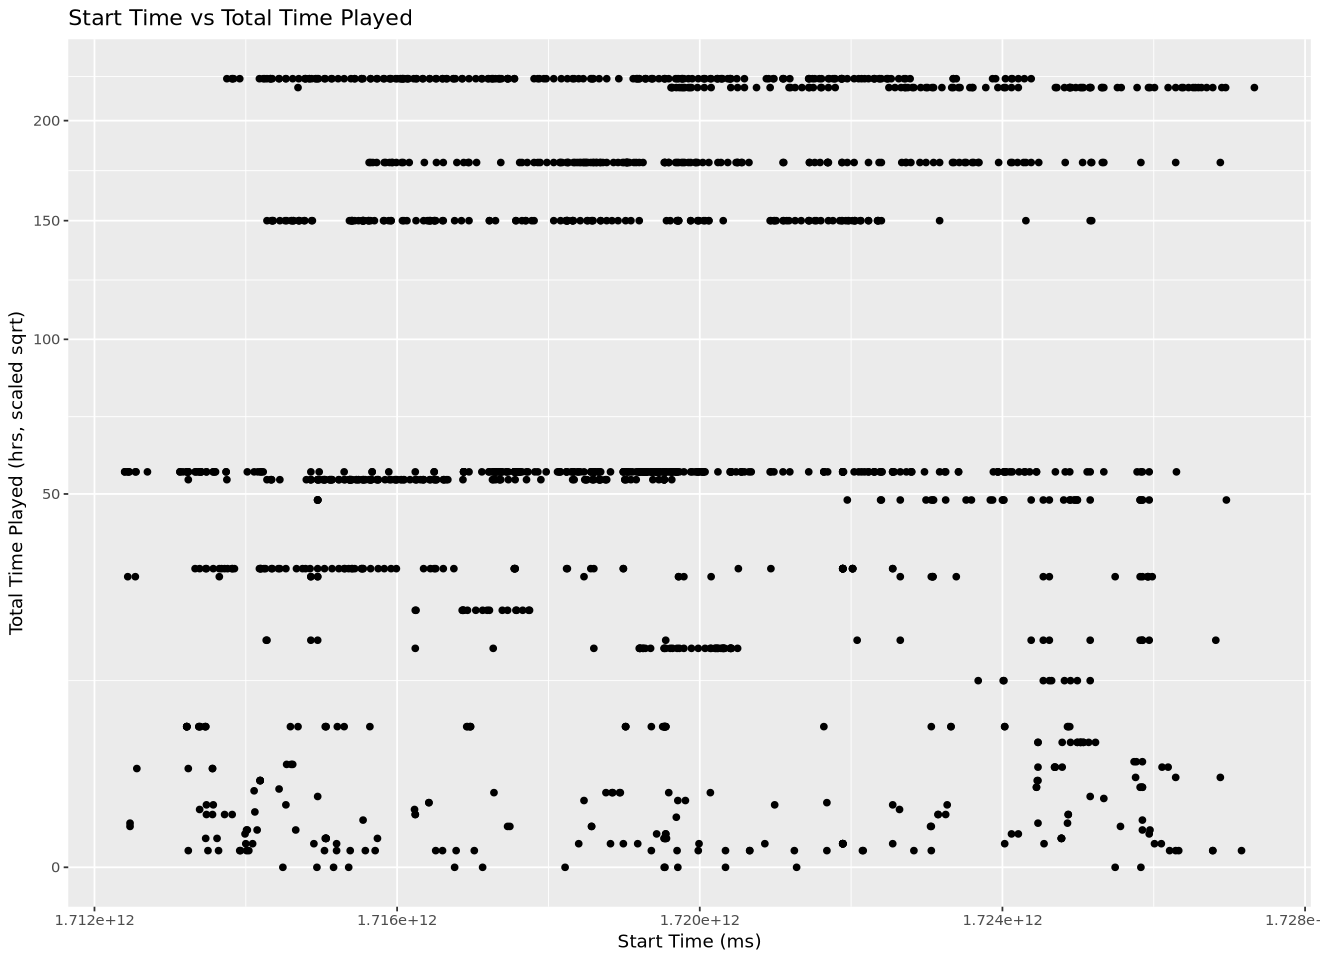

In [64]:
options(repr.plot.width = 11)
start_time_plot <-  combined_data |>
                    ggplot(aes(x = original_start_time, played_hours)) +
                    geom_point() +
                    labs(x = "Start Time (ms)", y = "Total Time Played (hrs, scaled sqrt)",
                         title = "Start Time vs Total Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
start_time_plot

Based on the *Start Time vs Total Time Played* graph, the is no clear relationship between when a user starts a session and thier total play time, but the number of times a user starts a session does seem to relate to it.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


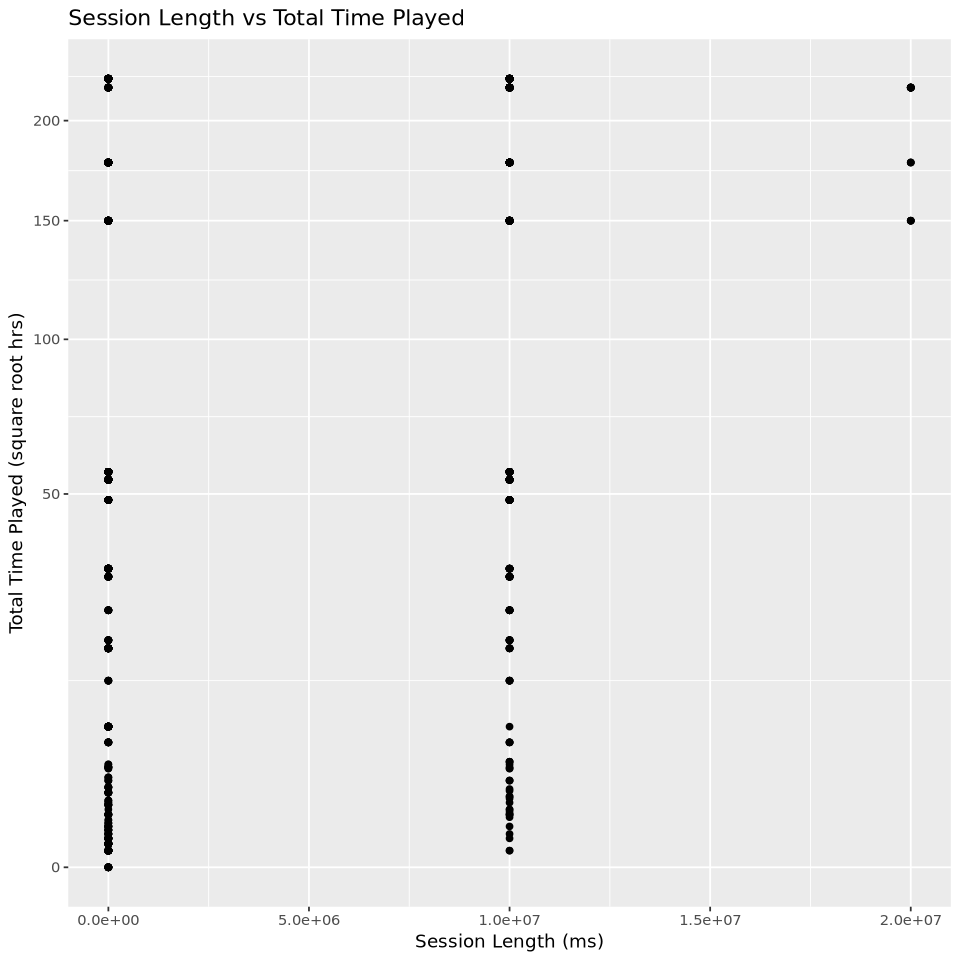

In [50]:
session_length_plot <-  combined_data |>
                    ggplot(aes(x = original_end_time-original_start_time, played_hours)) +
                    geom_point() +
                    labs(x = "Session Length (ms)", y = "Total Time Played (square root hrs)",
                         title = "Session Length vs Total Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
session_length_plot

From *Session Length vs Total Time Played* it can be seen that the `original_start_time` and `original_end_time` variables do not have enough precision to convey short intervals of time, therefore `start_time` and `end_time` will need to be converted to minutes and used in place of all instances of `original_start_time` and `original_end_time`.

One method to answer the proposed question using `player.csv` is via knn classification with the modified time intervals as the response variables, and `gender`, `experience`, and `subcribe` as the potential predictors. 

The data will be split 80% training data and 20% testing data, to be able to assess the performance of the model after training. To train the model, 5 fold cross validation will first be used in order to determine an ideal K value to use in the final model.